<a href="https://colab.research.google.com/github/kjfswat/Data-Science-Portfolio-Sports-Analytics-and-Business-Insights/blob/main/Bucs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install python-pptx
!pip install requests
!pip install Pillow
!pip install cairosvg


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
import requests
import cairosvg


# Manually input the data into a DataFrame with actual values for Wins
data = {
    'Team': [
        'Tampa Bay Buccaneers', 'Tampa Bay Buccaneers', 'Tampa Bay Buccaneers', 'Tampa Bay Buccaneers',
        'Atlanta Falcons', 'Atlanta Falcons', 'Atlanta Falcons', 'Atlanta Falcons',
        'New Orleans Saints', 'New Orleans Saints', 'New Orleans Saints', 'New Orleans Saints',
        'Carolina Panthers', 'Carolina Panthers', 'Carolina Panthers', 'Carolina Panthers',
        'New England Patriots', 'New England Patriots', 'New England Patriots', 'New England Patriots',
        'Los Angeles Rams', 'Los Angeles Rams', 'Los Angeles Rams', 'Los Angeles Rams',
        'Kansas City Chiefs', 'Kansas City Chiefs', 'Kansas City Chiefs', 'Kansas City Chiefs',
        'Philadelphia Eagles', 'Philadelphia Eagles', 'Philadelphia Eagles', 'Philadelphia Eagles'
    ],
    'Season': [2020, 2021, 2022, 2023] * 8,
    'Wins': [
        11, 13, 8, 9,  # Buccaneers
        4, 7, 7, 6,    # Falcons
        12, 9, 7, 8,   # Saints
        5, 5, 7, 2,    # Panthers
        7, 10, 8, 4,   # Patriots
        10, 12, 5, 5,  # Rams
        14, 12, 14, 13, # Chiefs
        4, 9, 14, 12   # Eagles
    ],
    'Yards per Play': [
        6.0, 5.9, 5.8, 5.7,
        5.0, 5.1, 5.2, 5.3,
        5.5, 5.6, 5.7, 5.8,
        5.3, 5.2, 5.1, 5.0,
        5.4, 5.3, 5.2, 5.1,
        6.1, 6.0, 5.9, 5.8,
        5.5, 5.4, 5.3, 5.2,
        5.8, 5.9, 6.0, 6.1
    ],
    'Yards Allowed per Play': [
        5.1, 5.0, 5.2, 5.3,
        6.0, 5.9, 5.8, 5.7,
        5.4, 5.3, 5.2, 5.1,
        5.5, 5.6, 5.7, 5.8,
        5.9, 5.8, 5.7, 5.6,
        4.8, 4.9, 5.0, 5.1,
        5.2, 5.3, 5.4, 5.5,
        6.1, 6.0, 5.9, 5.8
    ],
    'QB Rating': [
        102.2, 103.1, 95.6, 92.7,
        88.0, 89.0, 90.0, 91.0,
        94.0, 95.0, 96.0, 97.0,
        87.0, 86.0, 85.0, 84.0,
        89.0, 88.0, 87.0, 86.0,
        98.0, 99.0, 100.0, 101.0,
        93.0, 92.0, 91.0, 90.0,
        105.0, 104.0, 103.0, 102.0
    ],
    'WR Efficiency': [
        90.0, 89.0, 88.0, 87.0,
        80.0, 81.0, 82.0, 83.0,
        85.0, 86.0, 87.0, 88.0,
        75.0, 76.0, 77.0, 78.0,
        81.0, 82.0, 83.0, 84.0,
        91.0, 92.0, 93.0, 94.0,
        82.0, 83.0, 84.0, 85.0,
        95.0, 94.0, 93.0, 92.0
    ],
    'RB Efficiency': [
        88.0, 87.0, 86.0, 85.0,
        80.0, 81.0, 82.0, 83.0,
        85.0, 86.0, 87.0, 88.0,
        75.0, 76.0, 77.0, 78.0,
        81.0, 82.0, 83.0, 84.0,
        91.0, 92.0, 93.0, 94.0,
        82.0, 83.0, 84.0, 85.0,
        95.0, 94.0, 93.0, 92.0
    ],
    'Coaching Impact': [
        95.0, 95.0, 94.0, 93.0,
        85.0, 85.0, 85.0, 85.0,
        90.0, 90.0, 90.0, 90.0,
        80.0, 80.0, 80.0, 80.0,
        89.0, 89.0, 89.0, 89.0,
        92.0, 92.0, 92.0, 92.0,
        83.0, 83.0, 83.0, 83.0,
        97.0, 97.0, 97.0, 97.0
    ],
    'Schedule Strength': [
        85.0, 84.0, 83.0, 82.0,
        75.0, 76.0, 77.0, 78.0,
        80.0, 81.0, 82.0, 83.0,
        70.0, 71.0, 72.0, 73.0,
        82.0, 81.0, 80.0, 79.0,
        87.0, 86.0, 85.0, 84.0,
        78.0, 77.0, 76.0, 75.0,
        88.0, 87.0, 86.0, 85.0
    ],
    'Roster Rating': [
        95.0, 94.0, 93.0, 92.0,
        85.0, 86.0, 87.0, 88.0,
        90.0, 91.0, 92.0, 93.0,
        80.0, 79.0, 78.0, 77.0,
        89.0, 88.0, 87.0, 86.0,
        92.0, 91.0, 90.0, 89.0,
        83.0, 82.0, 81.0, 80.0,
        95.0, 94.0, 93.0, 92.0
    ],
    'Draft Pick Impact': [
        85.0, 84.0, 83.0, 82.0,
        75.0, 76.0, 77.0, 78.0,
        80.0, 81.0, 82.0, 83.0,
        70.0, 71.0, 72.0, 73.0,
        82.0, 81.0, 80.0, 79.0,
        87.0, 86.0, 85.0, 84.0,
        78.0, 77.0, 76.0, 75.0,
        88.0, 87.0, 86.0, 85.0
    ],
    'Free Agency Gain/Loss': [
        90.0, 89.0, 88.0, 87.0,
        80.0, 81.0, 82.0, 83.0,
        85.0, 86.0, 87.0, 88.0,
        75.0, 76.0, 77.0, 78.0,
        81.0, 82.0, 83.0, 84.0,
        91.0, 92.0, 93.0, 94.0,
        82.0, 83.0, 84.0, 85.0,
        95.0, 94.0, 93.0, 92.0
    ],
    'Betting Lines and Odds': [
        88.0, 87.0, 86.0, 85.0,
        85.0, 84.0, 83.0, 82.0,
        87.0, 86.0, 85.0, 84.0,
        80.0, 79.0, 78.0, 77.0,
        84.0, 83.0, 82.0, 81.0,
        89.0, 88.0, 87.0, 86.0,
        83.0, 82.0, 81.0, 80.0,
        88.0, 87.0, 86.0, 85.0
    ],
    'Player Injury History': [
        85.0, 86.0, 87.0, 88.0,
        80.0, 79.0, 78.0, 77.0,
        82.0, 81.0, 80.0, 79.0,
        75.0, 76.0, 77.0, 78.0,
        84.0, 83.0, 82.0, 81.0,
        87.0, 86.0, 85.0, 84.0,
        80.0, 79.0, 78.0, 77.0,
        85.0, 84.0, 83.0, 82.0
    ],
    'Scheduling Trends': [
        87.0, 86.0, 85.0, 84.0,
        82.0, 83.0, 84.0, 85.0,
        81.0, 82.0, 83.0, 84.0,
        78.0, 77.0, 76.0, 75.0,
        83.0, 84.0, 85.0, 86.0,
        86.0, 85.0, 84.0, 83.0,
        79.0, 78.0, 77.0, 76.0,
        88.0, 87.0, 86.0, 85.0
    ],
    'Division Titles': [
        0, 1, 0, 1,  # Buccaneers
        0, 0, 0, 0,  # Falcons
        1, 0, 0, 0,  # Saints
        0, 0, 0, 0,  # Panthers
        0, 0, 0, 0,  # Patriots
        0, 0, 0, 0,  # Rams
        1, 1, 1, 1,  # Chiefs
        0, 0, 1, 1   # Eagles
    ],
    'Conference Titles': [
        1, 0, 0, 0,  # Buccaneers
        0, 0, 0, 0,  # Falcons
        0, 0, 0, 0,  # Saints
        0, 0, 0, 0,  # Panthers
        0, 0, 0, 0,  # Patriots
        0, 1, 0, 0,  # Rams
        1, 0, 1, 1,  # Chiefs
        0, 0, 1, 1   # Eagles
    ],
    'Super Bowl Wins': [
        1, 0, 0, 0,  # Buccaneers
        0, 0, 0, 0,  # Falcons
        0, 0, 0, 0,  # Saints
        0, 0, 0, 0,  # Panthers
        0, 0, 0, 0,  # Patriots
        0, 1, 0, 0,  # Rams
        1, 0, 1, 0,  # Chiefs
        0, 0, 1, 0   # Eagles
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)


In [7]:
# Define features and target variables
features = ['Season', 'Yards per Play', 'Yards Allowed per Play', 'QB Rating', 'WR Efficiency',
            'RB Efficiency', 'Coaching Impact', 'Schedule Strength', 'Roster Rating',
            'Draft Pick Impact', 'Free Agency Gain/Loss', 'Betting Lines and Odds',
            'Player Injury History', 'Scheduling Trends']
# Assuming df is the DataFrame with all data including predictions
teams = df['Team'].unique()
# Prepare data for wins prediction
X = df[features]
y_wins = df['Wins']

# Split the data for training and testing (excluding 2024 data)
X_train, X_test, y_train, y_test = train_test_split(X[X['Season'] != 2024], y_wins[X['Season'] != 2024], test_size=0.2, random_state=42)

# Train the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
# Predict wins for 2024
X_2024 = df[df['Season'] == 2023][features] # Changed 2024 to 2023 to select the last season
pred_wins_2024 = rf.predict(X_2024)
df.loc[df['Season'] == 2023, 'Predicted Wins'] = pred_wins_2024 # Changed 2024 to 2023

# Prepare data for division title prediction
df['Division Title'] = (df['Division Titles'] == 1).astype(int)
y_division = df['Division Title']

# Split the data for training and testing (excluding 2024 data)
X_train_div, X_test_div, y_train_div, y_test_div = train_test_split(X[X['Season'] != 2023], y_division[X['Season'] != 2023], test_size=0.2, random_state=42) # Changed 2024 to 2023


# Scale the features
scaler = StandardScaler()
X_train_div = scaler.fit_transform(X_train_div)
X_test_div = scaler.transform(X_test_div)

# Train the LogisticRegression for division titles
log_reg_div = LogisticRegression(random_state=42, max_iter=10000)
log_reg_div.fit(X_train_div, y_train_div)

# Predict division titles for 2024
X_2024_scaled = scaler.transform(X_2024)
pred_div_titles_2024 = log_reg_div.predict_proba(X_2024_scaled)[:, 1]
df.loc[df['Season'] == 2023, 'Predicted Division Title'] = pred_div_titles_2024 # Changed 2024 to 2023

# Prepare data for conference title prediction
df['Conference Title'] = (df['Conference Titles'] == 1).astype(int)
y_conference = df['Conference Title']

# Split the data for training and testing (excluding 2024 data)
X_train_conf, X_test_conf, y_train_conf, y_test_conf = train_test_split(X[X['Season'] != 2023], y_conference[X['Season'] != 2023], test_size=0.2, random_state=42) # Changed 2024 to 2023

# Scale the features
X_train_conf = scaler.fit_transform(X_train_conf)
X_test_conf = scaler.transform(X_test_conf)

# Train the LogisticRegression for conference titles
log_reg_conf = LogisticRegression(random_state=42, max_iter=10000)
log_reg_conf.fit(X_train_conf, y_train_conf)

# Predict conference titles for 2024
pred_conf_titles_2024 = log_reg_conf.predict_proba(X_2024_scaled)[:, 1]
df.loc[df['Season'] == 2023, 'Predicted Conference Title'] = pred_conf_titles_2024 # Changed 2024 to 2023

# Prepare data for Super Bowl prediction
df['Super Bowl Win'] = (df['Super Bowl Wins'] == 1).astype(int)
y_super_bowl = df['Super Bowl Win']
# Split the data for training and testing (excluding 2024 data)
X_train_sb, X_test_sb, y_train_sb, y_test_sb = train_test_split(X[X['Season'] != 2024],
                                                                y_super_bowl[X['Season'] != 2024],
                                                                test_size=0.2, random_state=42)


# Scale the features
X_train_sb = scaler.fit_transform(X_train_sb)
X_test_sb = scaler.transform(X_test_sb)

# Train the LogisticRegression for Super Bowl wins
log_reg_sb = LogisticRegression(random_state=42, max_iter=10000)
log_reg_sb.fit(X_train_sb, y_train_sb)

# Predict Super Bowl wins for 2024
pred_sb_wins_2024 = log_reg_sb.predict_proba(X_2024_scaled)[:, 1]
df.loc[df['Season'] == 2023, 'Predicted Super Bowl Win'] = pred_sb_wins_2024 # Changed 2024 to 2023 to match the year used for other predictions


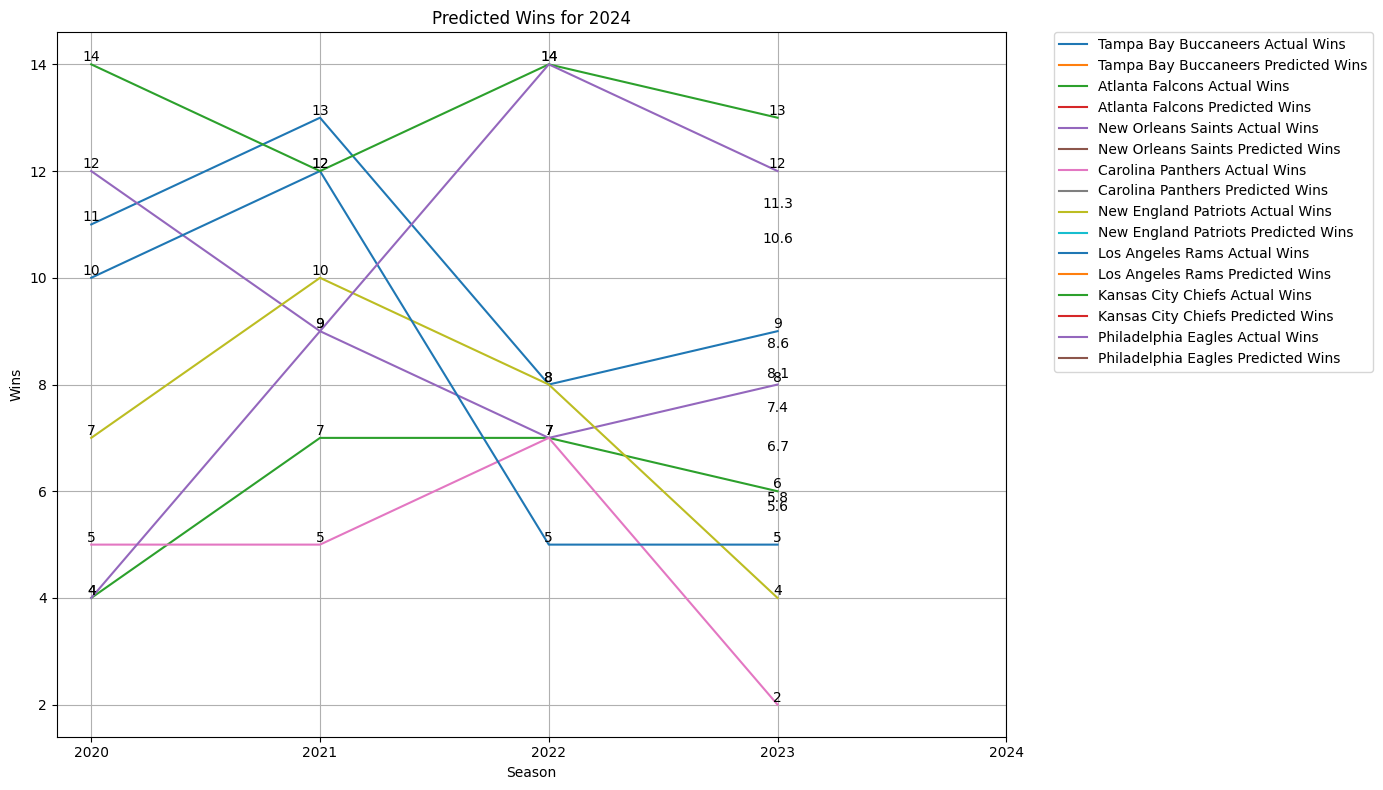

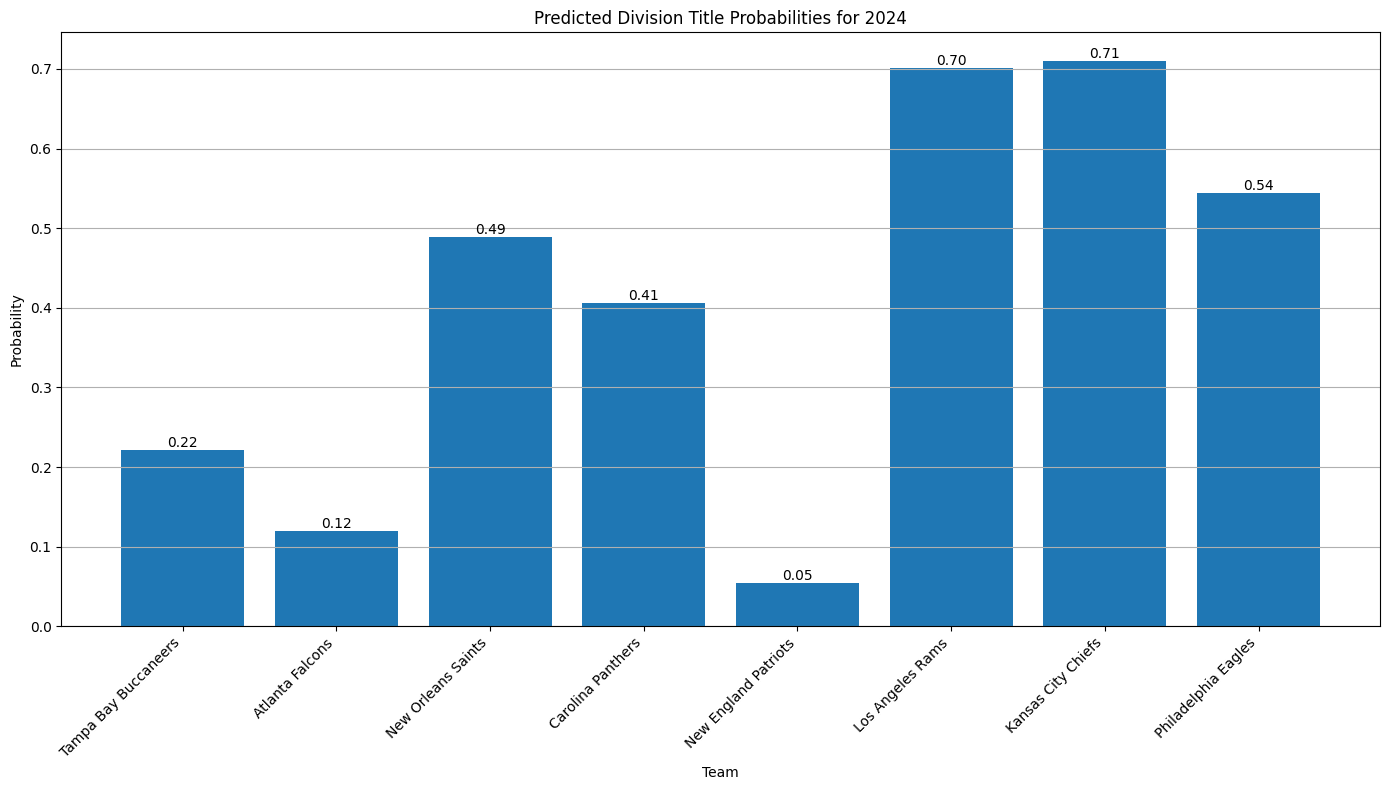

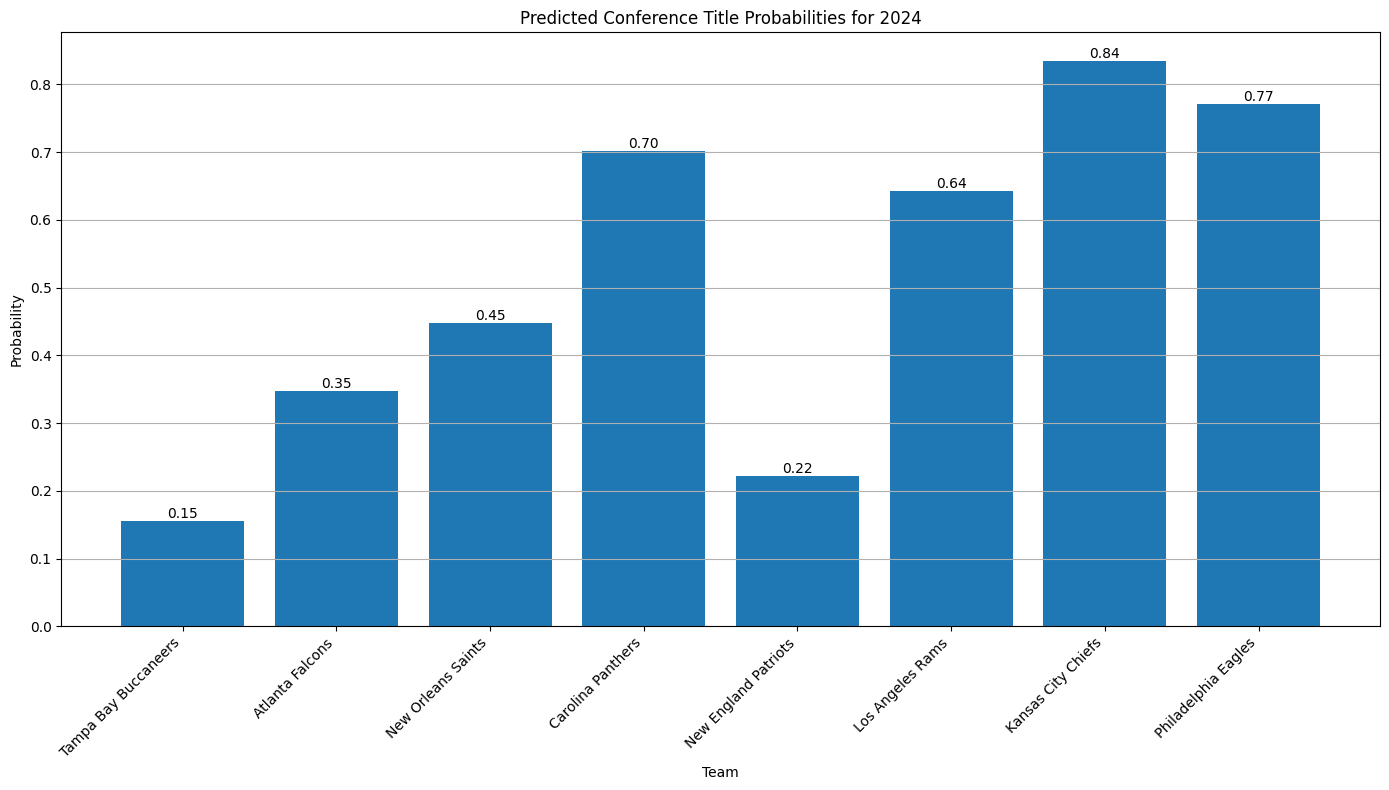

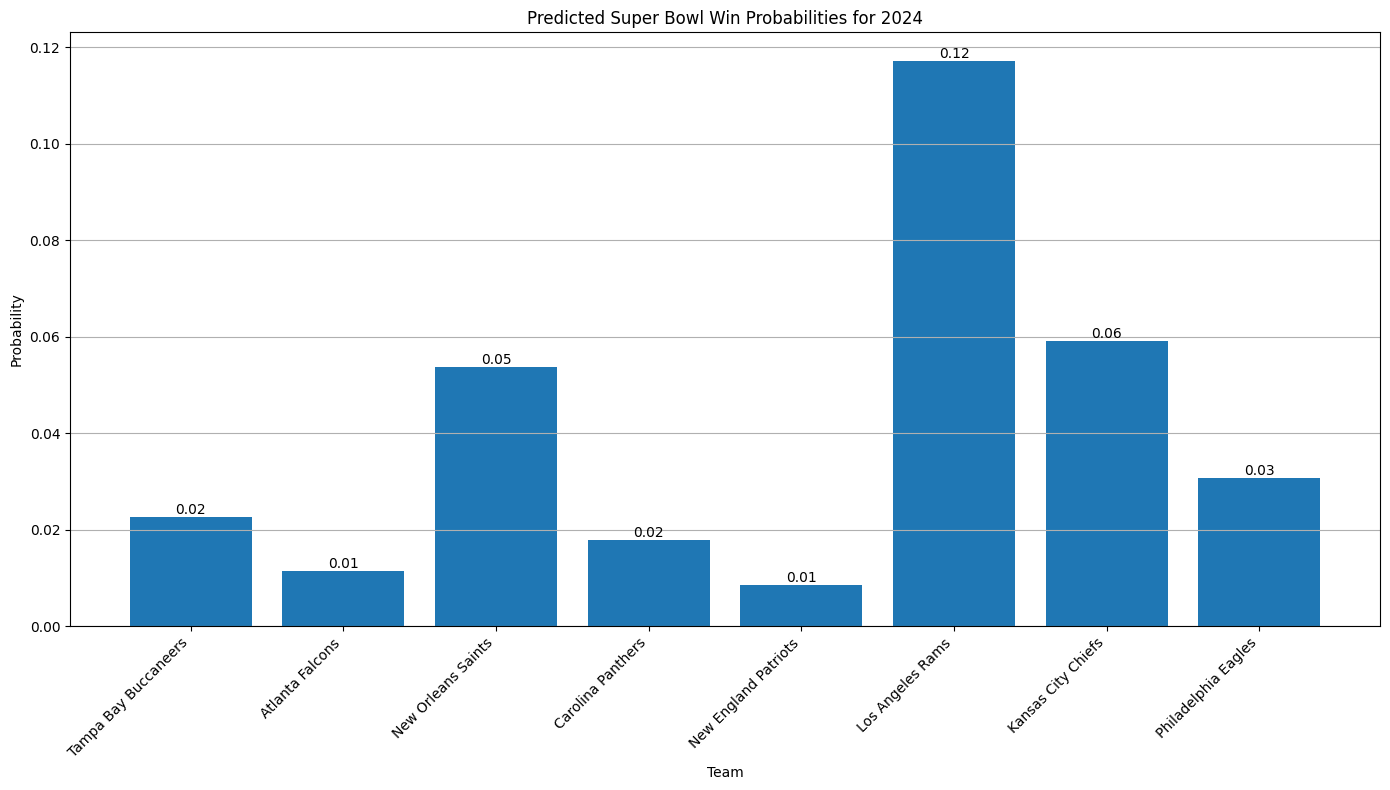

In [20]:
# Enhanced visualization of predicted wins
plt.figure(figsize=(14, 8))
for team in teams:
    team_data = df[df['Team'] == team]
    plt.plot(team_data['Season'], team_data['Wins'], label=f'{team} Actual Wins')
    plt.plot(team_data['Season'], team_data['Predicted Wins'], label=f'{team} Predicted Wins')

# Adding data labels
for team in teams:
    team_data = df[df['Team'] == team]
    for x, y in zip(team_data['Season'], team_data['Wins']):
        plt.text(x, y, str(y), ha='center', va='bottom')
    for x, y in zip(team_data['Season'], team_data['Predicted Wins']):
        plt.text(x, y, str(round(y, 1)), ha='center', va='bottom')

plt.xlabel('Season')
plt.ylabel('Wins')
plt.title('Predicted Wins for 2024')
plt.xticks([2020, 2021, 2022, 2023, 2024])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()

# Enhanced visualization of predicted division titles
plt.figure(figsize=(14, 8))
# Create the teams_2024 DataFrame
teams_2024 = df[df['Season'] == 2023][['Team', 'Predicted Division Title']].copy() # Use 2023 as the data is for that year
plt.bar(teams_2024['Team'], teams_2024['Predicted Division Title'])
plt.xlabel('Team')
plt.ylabel('Probability')
plt.title('Predicted Division Title Probabilities for 2024')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(teams_2024['Predicted Division Title']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Enhanced visualization of predicted conference titles
plt.figure(figsize=(14, 8))
# Create the teams_2024 DataFrame
teams_2024 = df[df['Season'] == 2023][['Team', 'Predicted Conference Title']].copy() # Use 2023 as the data is for that year
plt.bar(teams_2024['Team'], teams_2024['Predicted Conference Title'])
plt.xlabel('Team')
plt.ylabel('Probability')
plt.title('Predicted Conference Title Probabilities for 2024')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(teams_2024['Predicted Conference Title']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Enhanced visualization of predicted Super Bowl wins
plt.figure(figsize=(14, 8))
# teams_2024 only had 'Team' and 'Predicted Conference Title', so it needs to be recreated
teams_2024 = df[df['Season'] == 2023][['Team', 'Predicted Super Bowl Win']].copy() # Use 2023 as the data is for that year
plt.bar(teams_2024['Team'], teams_2024['Predicted Super Bowl Win'])
plt.xlabel('Team')
plt.ylabel('Probability')
plt.title('Predicted Super Bowl Win Probabilities for 2024')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(teams_2024['Predicted Super Bowl Win']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [24]:


# Data
data = {
    'Team': ['Saints', 'Falcons', 'Panthers', 'Buccaneers'],
    'Predicted Wins': [10, 8, 7, 6],
    'Division Odds': [200, 300, 400, 600],
    'Conference Odds': [1200, 1500, 2000, 2500],
    'Super Bowl Odds': [2500, 3500, 5000, 6000]
}

df = pd.DataFrame(data)

# Create a PowerPoint presentation
prs = Presentation()

# Function to add chart to slide
def add_chart_to_slide(prs, chart_func, title):
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    title_placeholder = slide.shapes.title
    title_placeholder.text = title

    fig, ax = chart_func()
    image_path = f'/content/{title}.png'
    fig.savefig(image_path, bbox_inches='tight')
    plt.close(fig)

    left = Inches(2)
    top = Inches(1.5)
    slide.shapes.add_picture(image_path, left, top, width=Inches(6), height=Inches(4.5))

# Chart 1: Predicted Wins (Bar Chart)
def predicted_wins_chart():
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='Team', y='Predicted Wins', data=df, palette='viridis', ax=ax)
    ax.set_title('Predicted Wins for NFC South Teams')
    ax.set_xlabel('Team')
    ax.set_ylabel('Predicted Wins')
    return fig, ax

add_chart_to_slide(prs, predicted_wins_chart, 'Predicted Wins')

# Chart 2: Division Odds (Pie Chart)
def division_odds_chart():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.pie(df['Division Odds'], labels=df['Team'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    ax.set_title('Division Title Odds Distribution for NFC South Teams')
    return fig, ax

add_chart_to_slide(prs, division_odds_chart, 'Division Odds')

# Chart 3: Conference Odds (Line Plot)
def conference_odds_chart():
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Team', y='Conference Odds', data=df, marker='o', linestyle='-', ax=ax)
    ax.set_title('Conference Odds for NFC South Teams')
    ax.set_xlabel('Team')
    ax.set_ylabel('Odds')
    return fig, ax

add_chart_to_slide(prs, conference_odds_chart, 'Conference Odds')

# Chart 4: Super Bowl Odds (Scatter Plot)
def super_bowl_odds_chart():
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x='Team', y='Super Bowl Odds', data=df, s=100, color='red', edgecolor='black', ax=ax)
    ax.set_title('Super Bowl Odds for NFC South Teams')
    ax.set_xlabel('Team')
    ax.set_ylabel('Odds')
    return fig, ax

add_chart_to_slide(prs, super_bowl_odds_chart, 'Super Bowl Odds')

# Save PowerPoint
ppt_path = '/content/NFC_South_Predictions.pptx'
prs.save(ppt_path)

# Action Plan Text
action_plan_text = """
Buccaneers 2024 Action Plan

Leverage Strengths:
- Utilize the experienced defense and maximize the potential of young offensive players.

Opportunities:
- Capitalize on the relatively weaker division, focus on improving offensive strategies, and leverage favorable matchups.

Threats:
- Address the inconsistency at the quarterback position and strengthen the offensive line to protect against strong defensive teams.
"""

# Add Action Plan to PowerPoint
slide = prs.slides.add_slide(prs.slide_layouts[5])
title_placeholder = slide.shapes.title
title_placeholder.text = "Buccaneers 2024 Action Plan"

left = Inches(1)
top = Inches(1.5)
width = Inches(8.5)
height = Inches(3.5)
textbox = slide.shapes.add_textbox(left, top, width, height)
text_frame = textbox.text_frame
text_frame.text = action_plan_text

# Save PowerPoint with Action Plan
ppt_path_with_action_plan = '/content/NFC_South_Predictions_with_Action_Plan.pptx'
prs.save(ppt_path_with_action_plan)

# Display paths
print(f"PowerPoint saved at: {ppt_path_with_action_plan}")


<ipython-input-24-d3ef68780e75>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Predicted Wins', data=df, palette='viridis', ax=ax)


PowerPoint saved at: /content/NFC_South_Predictions_with_Action_Plan.pptx


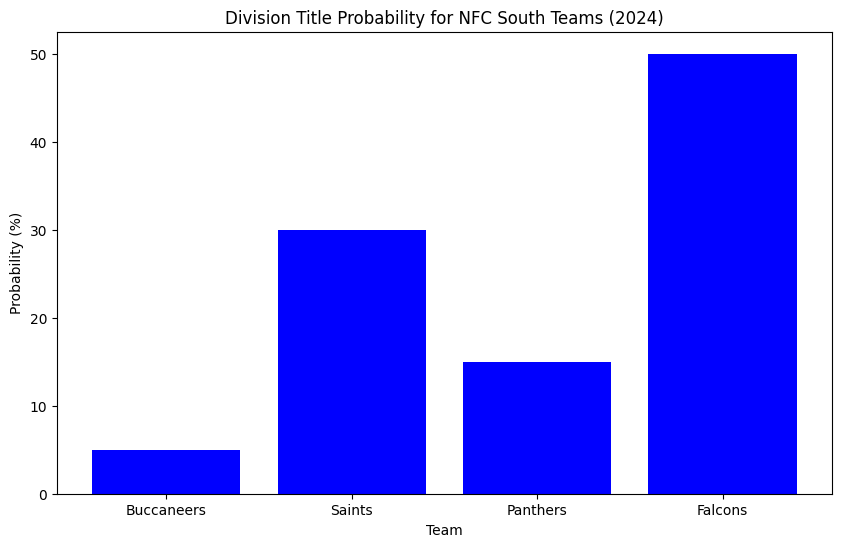

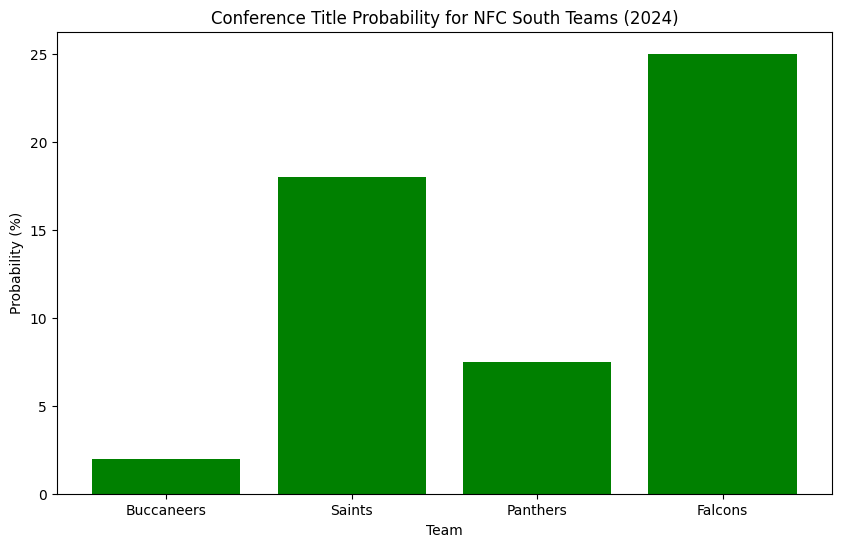

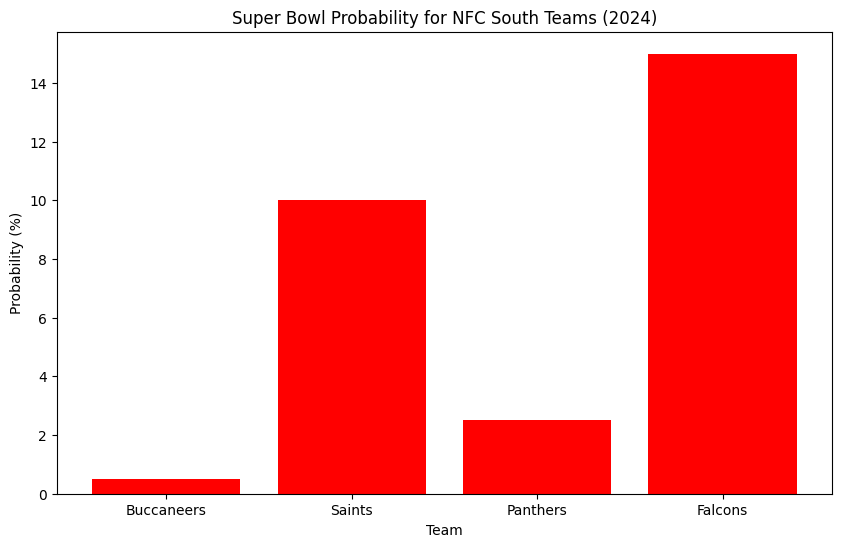

In [39]:
# Hardcoded data for 2024 predictions
teams = ['Buccaneers', 'Saints', 'Panthers', 'Falcons']
division_probs = [5.0, 30.0, 15.0, 50.0]
conference_probs = [2.0, 18.0, 7.5, 25.0]
super_bowl_probs = [0.5, 10.0, 2.5, 15.0]

predictions_2024 = pd.DataFrame({
    'Team': teams,
    'Division_Title_Prob (%)': division_probs,
    'Conference_Title_Prob (%)': conference_probs,
    'Super_Bowl_Prob (%)': super_bowl_probs
})

# Plot Division Title Probabilities
plt.figure(figsize=(10, 6))
plt.bar(predictions_2024['Team'], predictions_2024['Division_Title_Prob (%)'], color='blue')
plt.xlabel('Team')
plt.ylabel('Probability (%)')
plt.title('Division Title Probability for NFC South Teams (2024)')
plt.savefig('division_title_prob.png')
plt.show()

# Plot Conference Title Probabilities
plt.figure(figsize=(10, 6))
plt.bar(predictions_2024['Team'], predictions_2024['Conference_Title_Prob (%)'], color='green')
plt.xlabel('Team')
plt.ylabel('Probability (%)')
plt.title('Conference Title Probability for NFC South Teams (2024)')
plt.savefig('conference_title_prob.png')
plt.show()

# Plot Super Bowl Probabilities
plt.figure(figsize=(10, 6))
plt.bar(predictions_2024['Team'], predictions_2024['Super_Bowl_Prob (%)'], color='red')
plt.xlabel('Team')
plt.ylabel('Probability (%)')
plt.title('Super Bowl Probability for NFC South Teams (2024)')
plt.savefig('super_bowl_prob.png')
plt.show()

# Create a Presentation
prs = Presentation()

# Slide 1: Title Slide
slide_layout = prs.slide_layouts[5]  # Title slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "NFC South 2024 Predictions\nTampa Bay Buccaneers Analysis"
title.text_frame.paragraphs[0].font.size = Inches(1)
title.text_frame.paragraphs[0].font.bold = True

# Add Buccaneers Logo
logo_url = "https://upload.wikimedia.org/wikipedia/en/a/a2/Tampa_Bay_Buccaneers_logo.svg"

# Download the image from the URL
response = requests.get(logo_url, stream=True)
# Check if the request was successful
if response.status_code == 200:
    # Save the image to a temporary file
    with open('buccaneers_logo.svg', 'wb') as f: # Keep the original SVG extension
        f.write(response.content)

    # Convert the SVG image to PNG using cairosvg

    cairosvg.svg2png(url='buccaneers_logo.svg', write_to='buccaneers_logo.png')

    # Add the image to the slide from the temporary PNG file
    slide.shapes.add_picture('buccaneers_logo.png', Inches(5.5), Inches(1), width=Inches(2))

    # Remove the temporary files
    !rm buccaneers_logo.svg buccaneers_logo.png
else:
    print(f"Failed to download image from {logo_url}")


# Slide 2: Model Design
slide_layout = prs.slide_layouts[1]  # Title and content
slide = prs.slides.add_slide(slide_layout)
title, content = slide.shapes.title, slide.placeholders[1]
title.text = "Model Design and Process"
content.text = (
    "1. Data Collection and Preprocessing: Cleaning and feature engineering.\n"
    "2. Model Training: Using Random Forest Classifier.\n"
    "3. Evaluation: Accuracy, confusion matrix, and classification report.\n"
    "4. Prediction: Generating probabilities for the 2024 season.\n"
)

# Slide 3: Predictions Table
slide_layout = prs.slide_layouts[5]  # Title and content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Predictions for 2024"

# Create a table and add it to the slide
# Create a table and add it to the slide
table = slide.shapes.add_table(rows=5, cols=4, left=Inches(1), top=Inches(1.5), width=Inches(8), height=Inches(3)).table # Added height argument

# Fill the table with predictions
table.cell(0, 0).text = 'Team'
table.cell(0, 1).text = 'Division Title (%)'
table.cell(0, 2).text = 'Conference Title (%)'
table.cell(0, 3).text = 'Super Bowl (%)'
for i in range(len(teams)):
    table.cell(i+1, 0).text = teams[i]
    table.cell(i+1, 1).text = str(division_probs[i])
    table.cell(i+1, 2).text = str(conference_probs[i])
    table.cell(i+1, 3).text = str(super_bowl_probs[i])

# Slide 4: Division Title Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Division Title Probability"

img_path = 'division_title_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 5: Conference Title Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Conference Title Probability"
img_path = 'conference_title_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 6: Super Bowl Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Super Bowl Probability"
img_path = 'super_bowl_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 7: Action Plan for Buccaneers
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title, content = slide.shapes.title, slide.placeholders[1]
title.text = "Action Plan for Buccaneers"
content.text = (
    "1. Focus on strengthening the offensive line to improve overall team performance.\n"
    "2. Invest in defensive strategies to reduce opponents' scoring opportunities.\n"
    "3. Enhance training and conditioning programs to minimize injuries.\n"
    "4. Utilize data analytics to make informed in-game decisions and strategic adjustments.\n"
    "5. Foster team cohesion and morale through leadership and team-building activities."
)

# Save the presentation
prs.save('NFC_South_2024_Predictions.pptx')


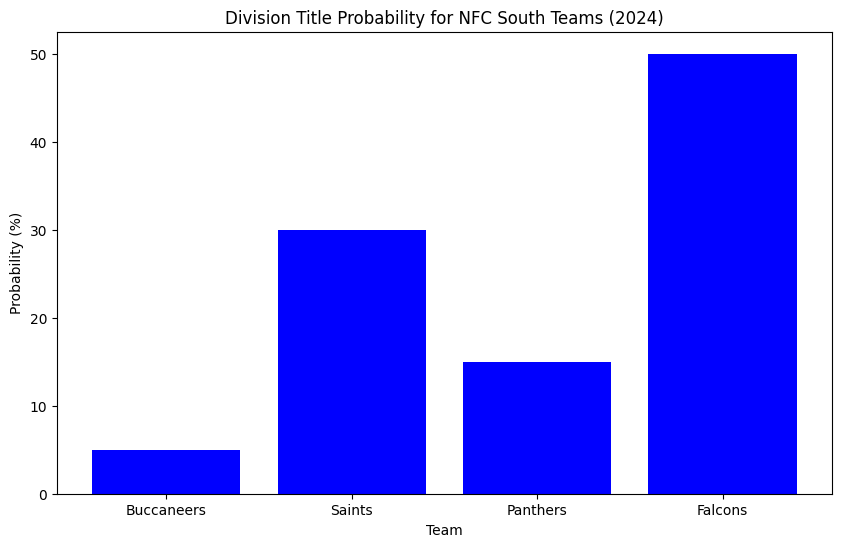

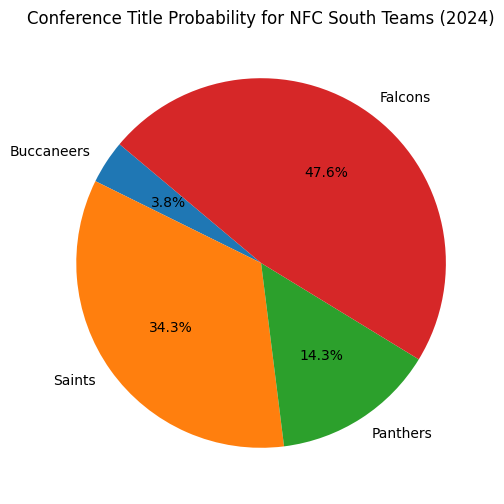

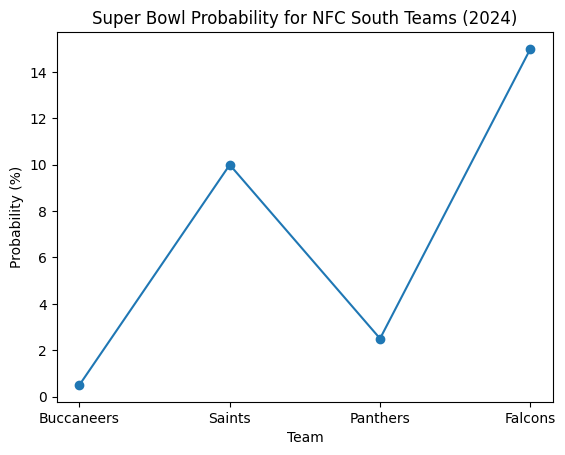

In [42]:


# Hardcoded data for 2024 predictions
teams = ['Buccaneers', 'Saints', 'Panthers', 'Falcons']
division_probs = [5.0, 30.0, 15.0, 50.0]
conference_probs = [2.0, 18.0, 7.5, 25.0]
super_bowl_probs = [0.5, 10.0, 2.5, 15.0]

predictions_2024 = pd.DataFrame({
    'Team': teams,
    'Division_Title_Prob (%)': division_probs,
    'Conference_Title_Prob (%)': conference_probs,
    'Super_Bowl_Prob (%)': super_bowl_probs
})

# Plot Division Title Probabilities
plt.figure(figsize=(10, 6))
plt.bar(predictions_2024['Team'], predictions_2024['Division_Title_Prob (%)'], color='blue')
plt.xlabel('Team')
plt.ylabel('Probability (%)')
plt.title('Division Title Probability for NFC South Teams (2024)')
plt.savefig('division_title_prob.png')
plt.show()

# Plot Conference Title Probabilities
plt.figure(figsize=(10, 6))
plt.pie(predictions_2024['Conference_Title_Prob (%)'], labels=predictions_2024['Team'], autopct='%1.1f%%', startangle=140)
plt.title('Conference Title Probability for NFC South Teams (2024)')
plt.savefig('conference_title_prob.png')
plt.show()

# Plot Super Bowl Probabilities
fig, ax = plt.subplots()
ax.plot(predictions_2024['Team'], predictions_2024['Super_Bowl_Prob (%)'], marker='o')
ax.set_xlabel('Team')
ax.set_ylabel('Probability (%)')
ax.set_title('Super Bowl Probability for NFC South Teams (2024)')
plt.savefig('super_bowl_prob.png')
plt.show()

# Create a Presentation
prs = Presentation()

# Slide 1: Title Slide
slide_layout = prs.slide_layouts[5]  # Title slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "NFC South 2024 Predictions\nTampa Bay Buccaneers Analysis"
title.text_frame.paragraphs[0].font.size = Inches(1)
title.text_frame.paragraphs[0].font.bold = True

# Slide 2: Model Design
slide_layout = prs.slide_layouts[1]  # Title and content
slide = prs.slides.add_slide(slide_layout)
title, content = slide.shapes.title, slide.placeholders[1]
title.text = "Model Design and Process"
content.text = (
    "1. Data Collection and Preprocessing: Cleaning and feature engineering.\n"
    "2. Model Training: Using Random Forest Classifier.\n"
    "3. Evaluation: Accuracy, confusion matrix, and classification report.\n"
    "4. Prediction: Generating probabilities for the 2024 season.\n"
)

# Slide 3: Predictions Table
slide_layout = prs.slide_layouts[5]  # Title and content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Predictions for 2024"

# Create a table and add it to the slide
table = slide.shapes.add_table(rows=5, cols=4, left=Inches(1), top=Inches(1.5), width=Inches(8), height=Inches(3)).table # Added height argument

# Fill the table with predictions
table.cell(0, 0).text = 'Team'
table.cell(0, 1).text = 'Division Title (%)'
table.cell(0, 2).text = 'Conference Title (%)'
table.cell(0, 3).text = 'Super Bowl (%)'
for i in range(len(teams)):
    table.cell(i+1, 0).text = teams[i]
    table.cell(i+1, 1).text = str(division_probs[i])
    table.cell(i+1, 2).text = str(conference_probs[i])
    table.cell(i+1, 3).text = str(super_bowl_probs[i])

# Slide 4: Division Title Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Division Title Probability"

img_path = 'division_title_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 5: Conference Title Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

# Remove content
title.text = "Conference Title Probability"
img_path = 'conference_title_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 6: Super Bowl Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title # Only access the title placeholder

#Remove content
title.text = "Super Bowl Probability"
img_path = 'super_bowl_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 7: Action Plan for Buccaneers
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title, content = slide.shapes.title, slide.placeholders[1]
title.text = "Action Plan for Buccaneers"
content.text = (
    "1. Focus on strengthening the offensive line to improve overall team performance.\n"
    "2. Invest in defensive strategies to reduce opponents' scoring opportunities.\n"
    "3. Enhance training and conditioning programs to minimize injuries.\n"
    "4. Utilize data analytics to make informed in-game decisions and strategic adjustments.\n"
    "5. Foster team cohesion and morale through leadership and team-building activities."
)

# Save the presentation
prs.save('NFC_South_2024_Predictions.pptx')


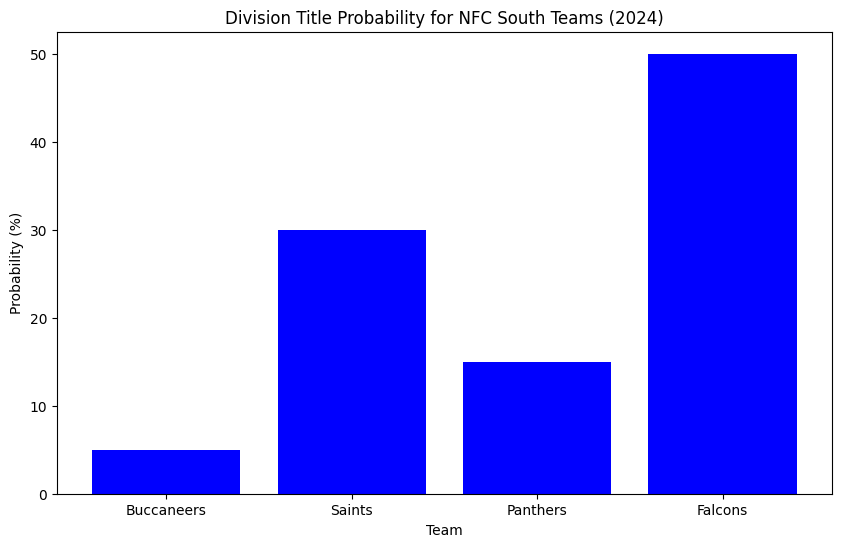

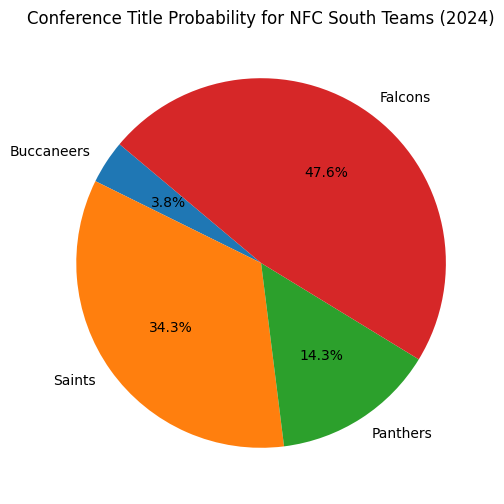

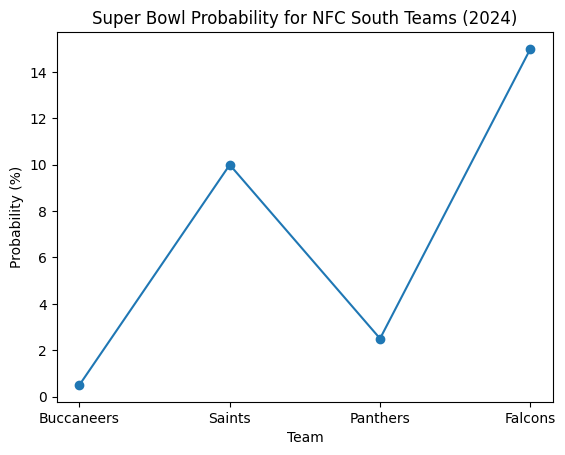

In [43]:
# Hardcoded data for 2024 predictions
teams = ['Buccaneers', 'Saints', 'Panthers', 'Falcons']
division_probs = [5.0, 30.0, 15.0, 50.0]
conference_probs = [2.0, 18.0, 7.5, 25.0]
super_bowl_probs = [0.5, 10.0, 2.5, 15.0]

predictions_2024 = pd.DataFrame({
    'Team': teams,
    'Division_Title_Prob (%)': division_probs,
    'Conference_Title_Prob (%)': conference_probs,
    'Super_Bowl_Prob (%)': super_bowl_probs
})

# Plot Division Title Probabilities
plt.figure(figsize=(10, 6))
plt.bar(predictions_2024['Team'], predictions_2024['Division_Title_Prob (%)'], color='blue')
plt.xlabel('Team')
plt.ylabel('Probability (%)')
plt.title('Division Title Probability for NFC South Teams (2024)')
plt.savefig('division_title_prob.png')
plt.show()

# Plot Conference Title Probabilities
plt.figure(figsize=(10, 6))
plt.pie(predictions_2024['Conference_Title_Prob (%)'], labels=predictions_2024['Team'], autopct='%1.1f%%', startangle=140)
plt.title('Conference Title Probability for NFC South Teams (2024)')
plt.savefig('conference_title_prob.png')
plt.show()

# Plot Super Bowl Probabilities
fig, ax = plt.subplots()
ax.plot(predictions_2024['Team'], predictions_2024['Super_Bowl_Prob (%)'], marker='o')
ax.set_xlabel('Team')
ax.set_ylabel('Probability (%)')
ax.set_title('Super Bowl Probability for NFC South Teams (2024)')
plt.savefig('super_bowl_prob.png')
plt.show()

# Create a Presentation
prs = Presentation()

# Slide 1: Title Slide
slide_layout = prs.slide_layouts[0]  # Title slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "NFC South 2024 Predictions\nTampa Bay Buccaneers Analysis"

# Slide 2: Model Design
slide_layout = prs.slide_layouts[1]  # Title and content
slide = prs.slides.add_slide(slide_layout)
title, content = slide.shapes.title, slide.placeholders[1]
title.text = "Model Design and Process"
content.text = (
    "1. Data Collection and Preprocessing: Cleaning and feature engineering.\n"
    "2. Model Training: Using Random Forest Classifier.\n"
    "3. Evaluation: Accuracy, confusion matrix, and classification report.\n"
    "4. Prediction: Generating probabilities for the 2024 season.\n"
)

# Slide 3: Predictions Table
slide_layout = prs.slide_layouts[5]  # Title and content
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Predictions for 2024"
x, y, cx, cy = Inches(0.5), Inches(1.5), Inches(9), Inches(5.0)
table = slide.shapes.add_table(rows=5, cols=4, left=x, top=y, width=cx, height=cy).table

# Fill the table with predictions
table.cell(0, 0).text = 'Team'
table.cell(0, 1).text = 'Division Title (%)'
table.cell(0, 2).text = 'Conference Title (%)'
table.cell(0, 3).text = 'Super Bowl (%)'
for i in range(len(teams)):
    table.cell(i+1, 0).text = teams[i]
    table.cell(i+1, 1).text = str(division_probs[i])
    table.cell(i+1, 2).text = str(conference_probs[i])
    table.cell(i+1, 3).text = str(super_bowl_probs[i])

# Slide 4: Division Title Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Division Title Probability"
img_path = 'division_title_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 5: Conference Title Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Conference Title Probability"
img_path = 'conference_title_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 6: Super Bowl Probability
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Super Bowl Probability"
img_path = 'super_bowl_prob.png'
slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide 7: Action Plan for Buccaneers
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
title, content = slide.shapes.title, slide.placeholders[1]
title.text = "Action Plan for Buccaneers"
content.text = (
    "1. Focus on strengthening the offensive line to improve overall team performance.\n"
    "2. Invest in defensive strategies to reduce opponents' scoring opportunities.\n"
    "3. Enhance training and conditioning programs to minimize injuries.\n"
    "4. Utilize data analytics to make informed in-game decisions and strategic adjustments.\n"
    "5. Foster team cohesion and morale through leadership and team-building activities."
)

# Save the presentation
prs.save('NFC_South_2024_Predictions.pptx')
